<a href="https://colab.research.google.com/github/JigarT10/CNN/blob/main/Classification%20MNIST/Classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [6]:
X_test.shape

(10000, 28, 28)

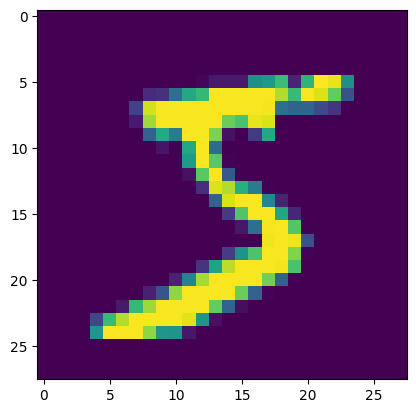

In [7]:
plt.imshow(X_train[0])

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 4ms/step - loss: 0.2793 - accuracy: 0.9178 - val_loss: 0.1510 - val_accuracy: 0.9571
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1187 - accuracy: 0.9646 - val_loss: 0.1171 - val_accuracy: 0.9652
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0797 - accuracy: 0.9754 - val_loss: 0.1327 - val_accuracy: 0.9619
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0606 - accuracy: 0.9811 - val_loss: 0.0943 - val_accuracy: 0.9729
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0478 - accuracy: 0.9850 - val_loss: 0.1123 - val_accuracy: 0.9698
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0375 - accuracy: 0.9877 - val_loss: 0.1010 - val_accuracy: 0.9724
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0320 - accuracy: 0.9891 - val_loss: 0.1014 - val_accuracy:

In [13]:
model.evaluate(X_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.1025 - accuracy: 0.9761


[0.10249818116426468, 0.9761000275611877]

In [14]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [15]:
y_pred = y_prob.argmax(axis=1)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9761

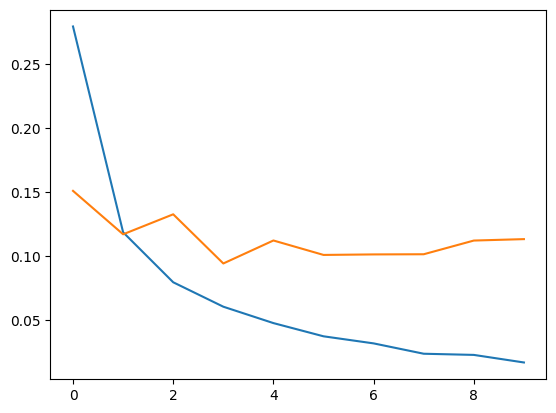

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

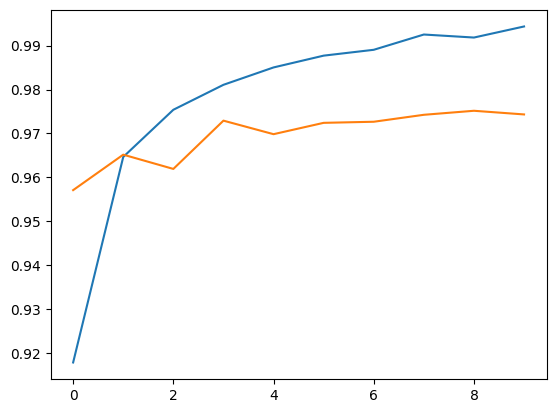

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

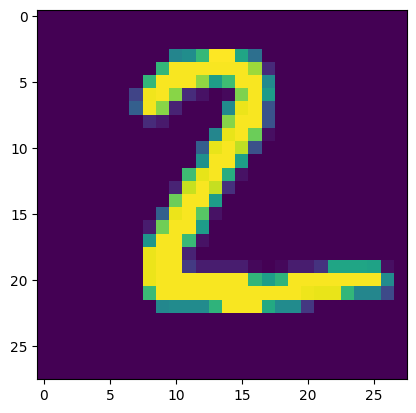

In [19]:
plt.imshow(X_test[1])

In [20]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 20ms/step


array([2])